In [34]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import requests
import dateparser

In [35]:
# Fetch data from Monexnews, for JPY data 1 Jan 2019 - 31 Des 2019
url = 'https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019'
url_get = requests.get(url)

# Parse HTML data with BS4
soup = BeautifulSoup(url_get.content, "html.parser")

In [36]:
# Get table and fetch all rows
table = soup.find('table')
tr = table.find_all('tr')

temp = []  # Temp list container

# Iterate over 
for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    date = row.find_all('td')[0].text
    ask = row.find_all('td')[1].text
    bid = row.find_all('td')[2].text

    temp.append((date, ask, bid))  # Append the needed information

temp = temp[::-1]  # Remove the header

# Create new dataframe from temp, and give name to column : 
## Ask : Kurs jual
## Bid : Kurs beli
df = pd.DataFrame(temp, columns=('Tanggal', 'Kurs jual', 'Kurs beli'))

In [37]:
# Parse Indonesian month using dateparser
df['Tanggal'] = df['Tanggal'].apply(lambda date : dateparser.parse(date))

# Replace ',' in numeric string to '.'
df['Kurs jual'].replace(',','.',regex=True, inplace=True)
df['Kurs beli'].replace(',','.',regex=True, inplace=True)

In [38]:
# Change data types
df = df.astype({'Tanggal' : 'datetime64[D]', 'Kurs jual' : 'float', 'Kurs beli' : 'float'})

Text(0, 0.5, 'IDR / JPY')

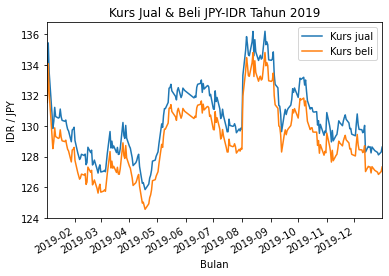

In [39]:
# Set date as index before plotting
df = df.set_index('date')
axes = df.plot(title='Kurs Jual & Beli JPY-IDR Tahun 2019')
axes.set_xlabel('Bulan')
axes.set_ylabel('IDR / JPY')

In [50]:
# Analysis

kurs_jual_min = df['Kurs jual'].min()
kurs_jual_max = df['Kurs jual'].max()

kurs_beli_min = df['Kurs beli'].min()
kurs_beli_max = df['Kurs beli'].max()

print(f"Kurs jual min : {kurs_jual_min} IDR / JPY")
print(f"Kurs jual max : {kurs_jual_max} IDR / JPY")

print(f"Kurs beli min : {kurs_beli_min} IDR / JPY")
print(f"Kurs beli max : {kurs_beli_max} IDR / JPY")

print(f"Range kurs jual : {round((((kurs_jual_max / kurs_jual_min) - 1) * 100), 2)}%")
print(f"Range kurs beli : {round((((kurs_beli_max / kurs_beli_min) - 1) * 100), 2)}%")

Kurs jual min : 125.84 IDR / JPY
Kurs jual max : 136.2 IDR / JPY
Kurs beli min : 124.55 IDR / JPY
Kurs beli max : 134.81 IDR / JPY
Range kurs jual : 8.23%
Range kurs beli : 8.24%


In [55]:
df.head(1)

,Kurs jual,Kurs beli
date,,
2019-01-02,132.89,131.54


In [57]:
df.tail(1)

,Kurs jual,Kurs beli
date,,
2019-12-31,128.62,127.32


## Analisa ##
Pergerakan IDR terhadap JPY terlihat cukup stabil dengan rentang pergerakan tahunan berkisar 8%, dan ditutup dengan IDR sedikit menguat dibandingkan JPY.

Kurs JPY menguat diantara disekitar bulan Juni-Juli, Agustus-September bertepatan dengan liburan musim gugur dan musim semi, dimana permintaan JPY meningkat akibat banyaknya turis yang berkunjung ke Jepang. JPY melemah di sekitar bulan Maret bertepatan dengan musim dingin.